In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.model import Model
from gallifrey.particles import rotated_dataset

from yt_maps import plot_component_maps

## DATA SETUP

In [4]:
snapshot = 127
resolution = 8192
sim_id = "37_11"

In [5]:
model = Model(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)
ds = model.ds
mw = model.halo

yt : [INFO     ] 2023-11-08 15:58:34,956 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-11-08 15:58:35,123 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-11-08 15:58:35,124 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-08 15:58:35,125 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-11-08 15:58:35,126 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-11-08 15:58:35,127 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-11-08 15:58:35,128 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-11-08 15:58:35,129 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-11-08 15:58:35,129 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-11-08 15:58:35,130 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-11-08 15:58:35,130 Parameters: hubble_constant      

## PLOT SETUP

In [6]:
figure_subdirectory = f"MilkyWayAnalogue/{model.resolution}/{model.sim_id}/{model.snapshot}/Galaxy_component_maps"
save = True

## CREATE DATA SOURCE

In [7]:
radius = 0.2 * mw.virial_radius()
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [8]:
sphere_data = mw.sphere(radius=radius)
rotated_data = {
    component: rotated_dataset(
        sphere_data,
        mw.centre(),
        normal_vector,
        [
            (f"{component}_stars", "total_number"),
        ],
        bounding_box=[
            [-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]
        ]
        * 3,
    )
    for component in ["bulge", "thin_disk", "thick_disk", "halo", "galaxy"]
}

yt : [INFO     ] 2023-11-08 15:59:20,321 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-11-08 15:59:20,324 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-08 15:59:20,325 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-11-08 15:59:20,327 Parameters: domain_right_edge         = [73778.96826036 73778.96826036 73778.96826036]
yt : [INFO     ] 2023-11-08 15:59:20,328 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-11-08 15:59:20,331 Allocating for 7.073e+05 particles
yt : [INFO     ] 2023-11-08 15:59:37,926 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-11-08 15:59:37,927 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-08 15:59:37,928 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-11-08 15:59:37,929 Parameters: domain_right_edge         = [73778.96826036 73778.

## PLOT MAPS

yt : [INFO     ] 2023-11-08 16:08:09,749 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:09,750 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:09,755 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:09,756 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:09,758 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-08 16:08:12,893 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:12,894 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:12,898 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:12,899 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:12,900 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-08 16:08:17,147 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:17,148 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:17,152 xlim = -21.

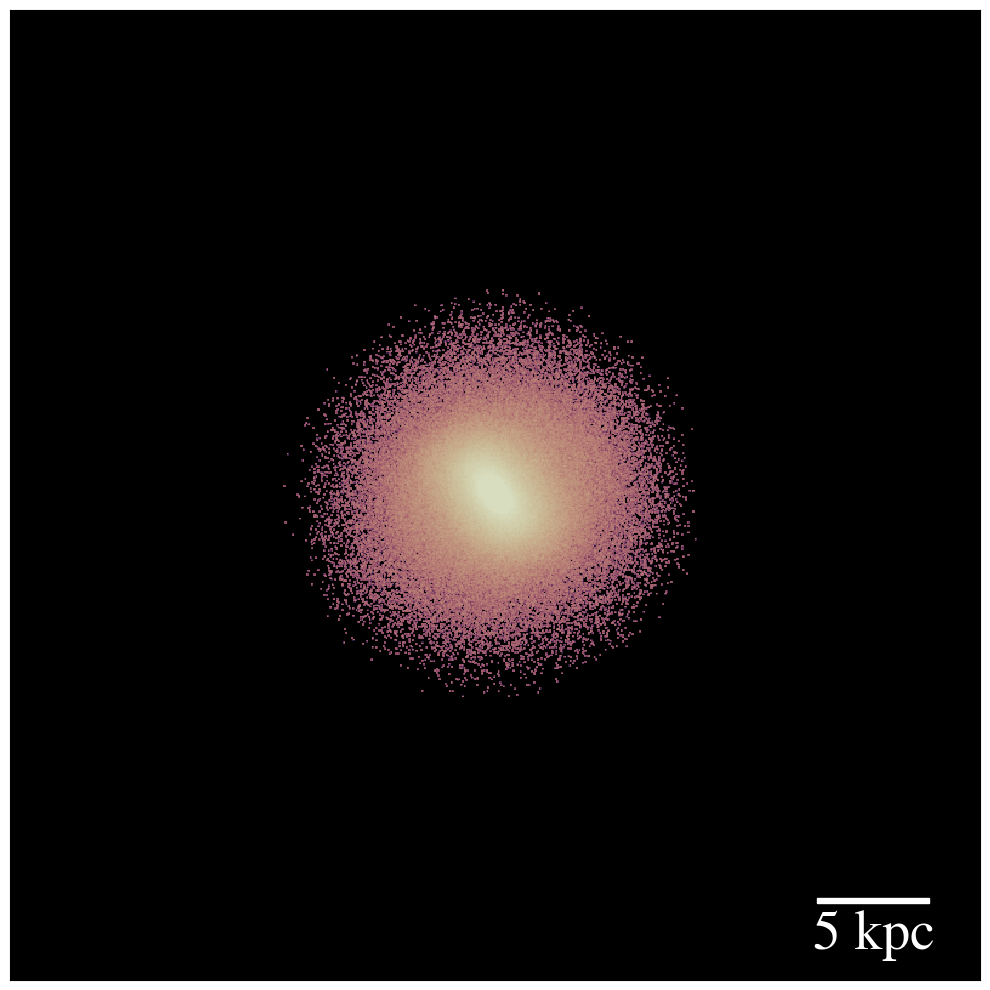

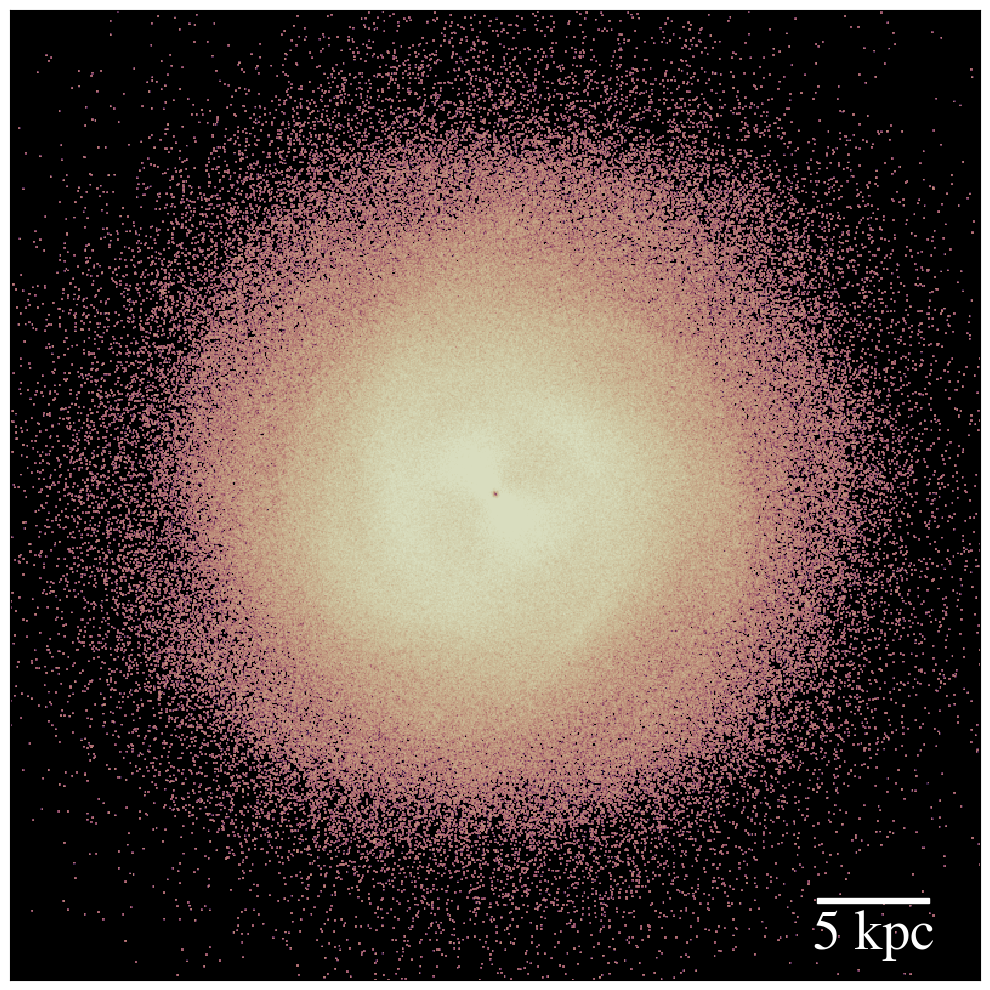

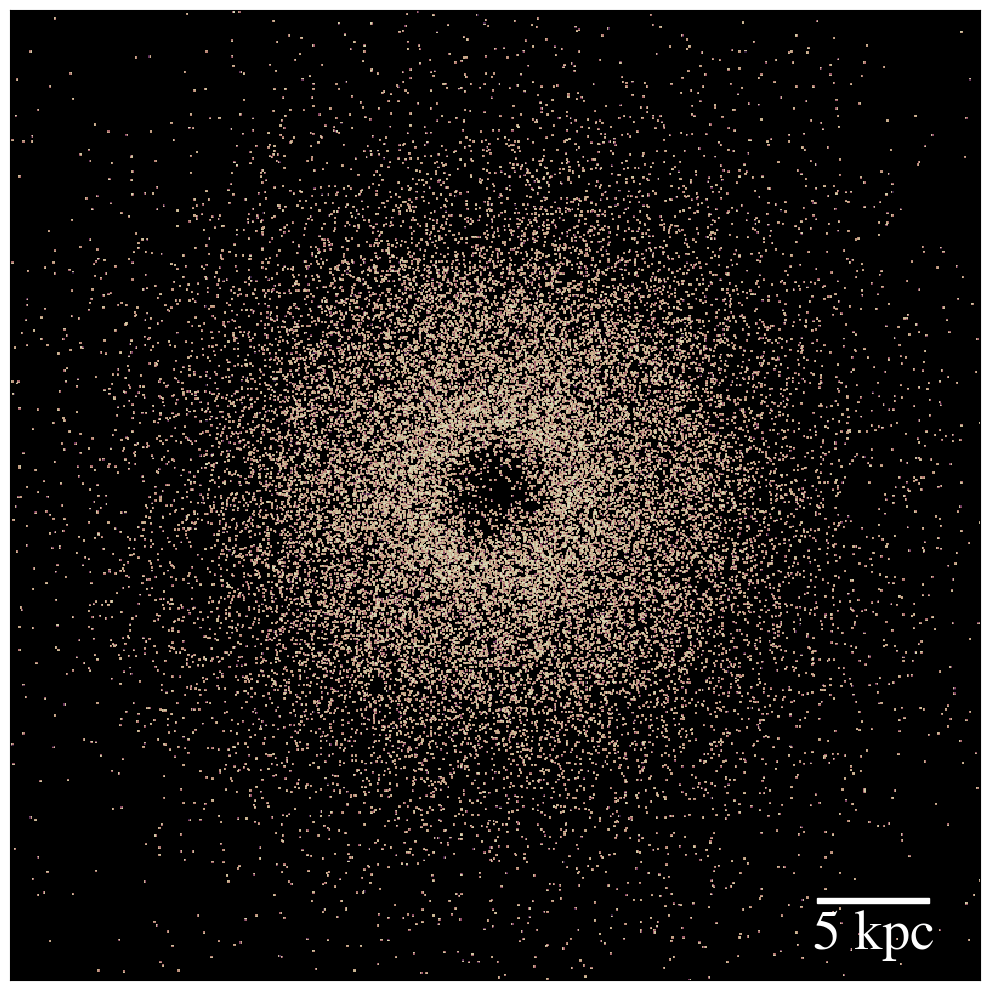

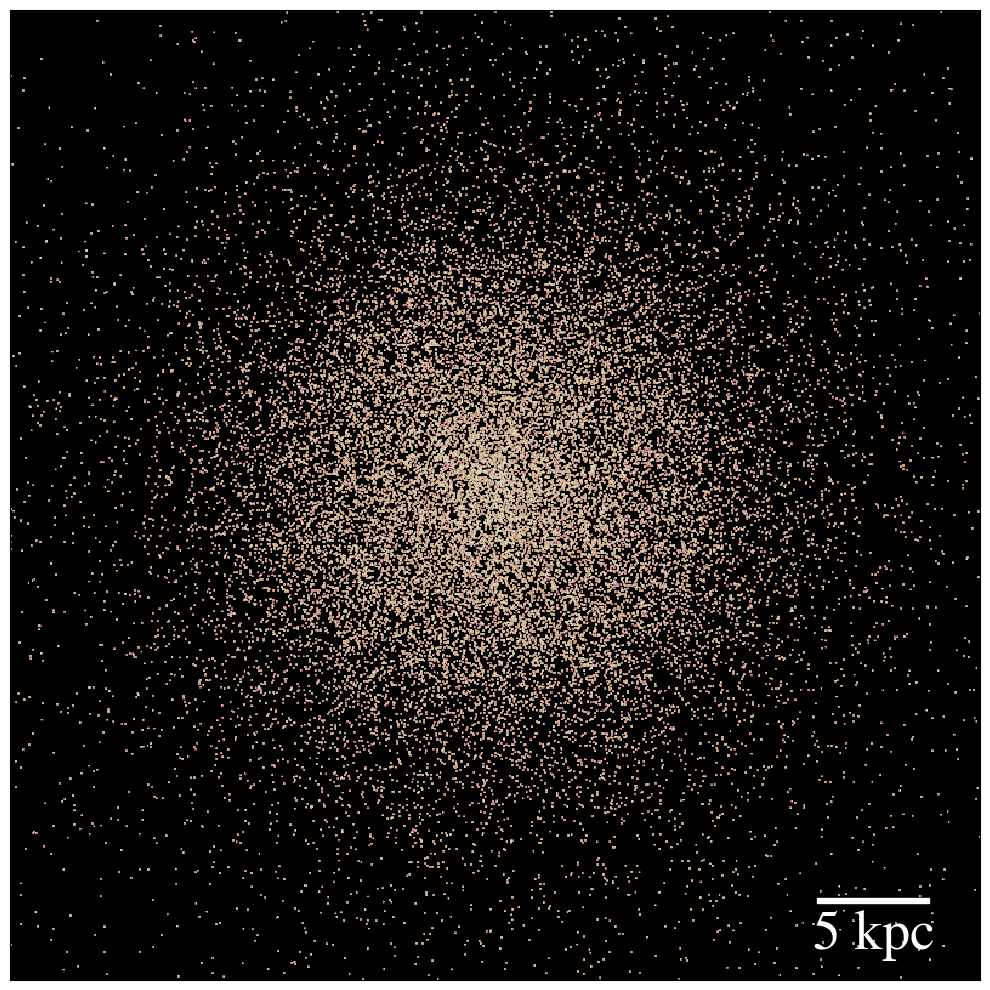

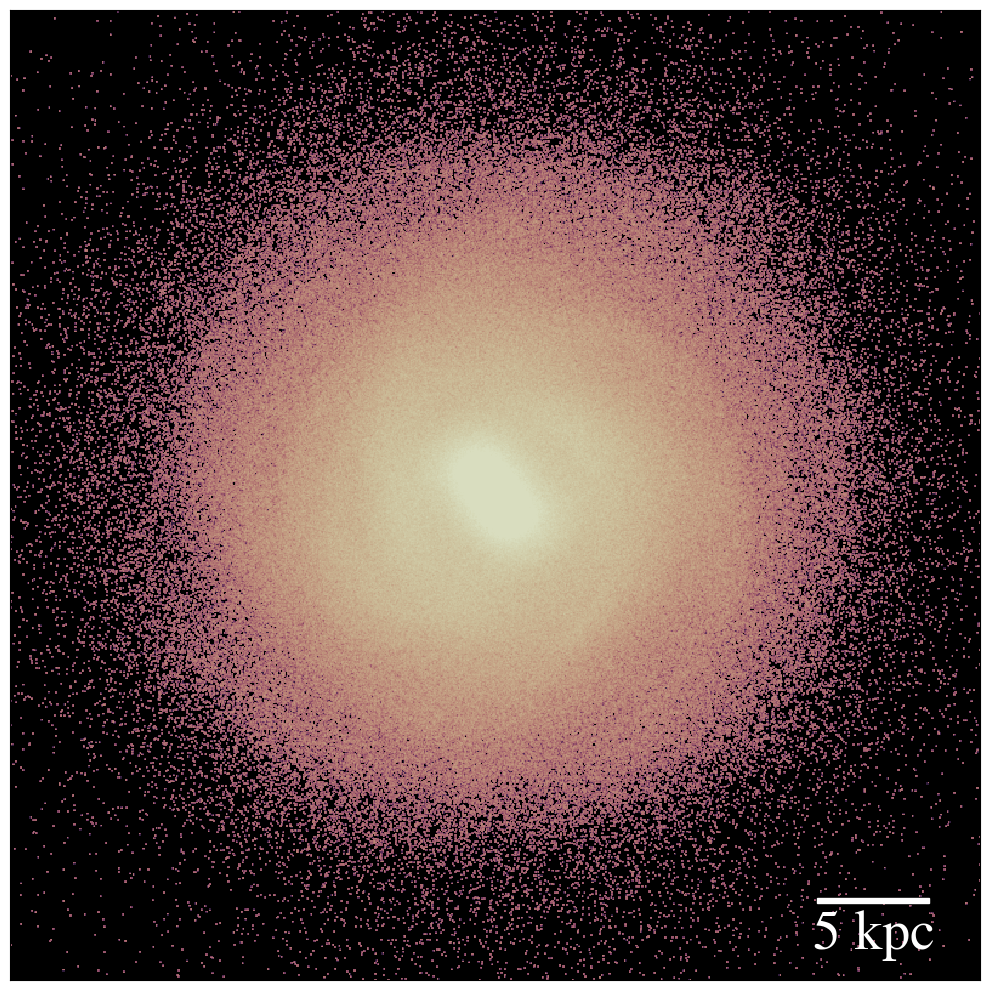

In [14]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="z",
    save=save,
    figure_subdirectory=figure_subdirectory,
)

yt : [INFO     ] 2023-11-08 16:08:32,103 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:32,105 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-08 16:08:32,110 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:32,110 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-08 16:08:32,112 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'


yt : [INFO     ] 2023-11-08 16:08:34,386 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:34,388 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-08 16:08:34,392 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:34,392 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-08 16:08:34,395 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-08 16:08:37,218 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:37,219 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-08 16:08:37,224 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:37,225 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-08 16:08:37,227 Splatting (('thick_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-08 16:08:39,222 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-08 16:08:39,223 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-08 16:08:39,228 xlim = -21.65000

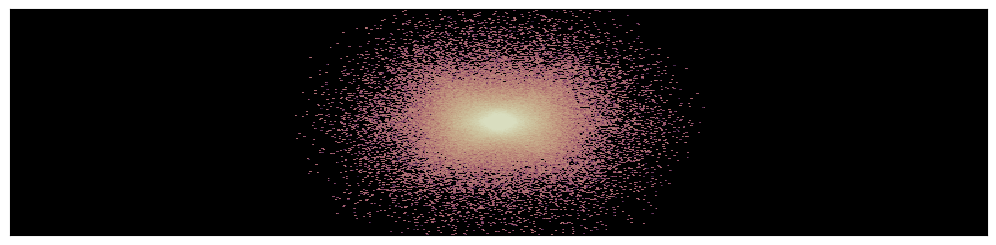

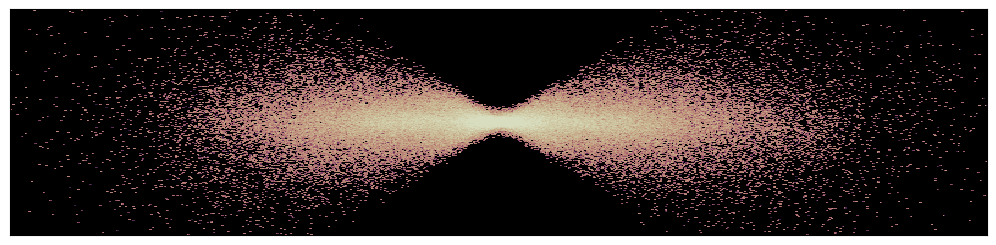

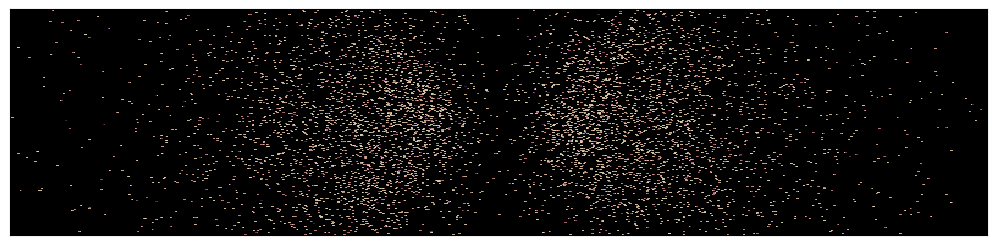

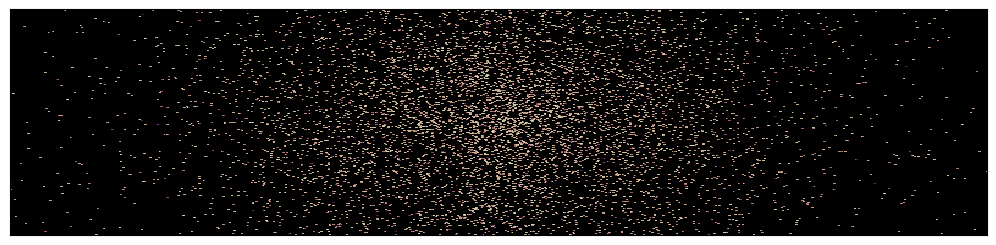

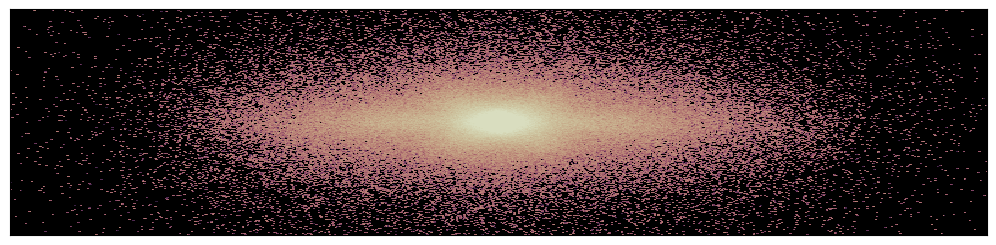

In [15]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="x",
    width=((43.3, "kpc"), (10, "kpc")),
    save=save,
    annotate_scale=False,
    figure_subdirectory=figure_subdirectory,
)